#Pandas</br>
(1) Series
- 1차원 데이터
- indexing 요소가 추가된 리스트 혹은 딕셔너리와 유사
- DataFrame 내에서 하나의 column이 됨</br></br>

(2) DataFrame
- 2차원의 표 형태

In [ ]:
# DataFrame 메소드 정리 : https://pandas.pydata.org/docs/reference/frame.html
# Series 메소드 정리 : https://pandas.pydata.org/docs/reference/series.html

## Series

In [ ]:
import pandas as pd
# from pandas import Series, DataFrame
import numpy as np

In [ ]:
import pandas as pd
S = pd.Series([11, 28, 82, 3, 6, 8])
S
# print(type(S))
# print(len(S))

0    11
1    28
2    82
3     3
4     6
5     8
dtype: int64

In [ ]:
S.index   # index 충

RangeIndex(start=0, stop=6, step=1)

In [ ]:
S.values  # values 층

array([11, 28, 82,  3,  6,  8])

In [ ]:
pd.Series(list('abc'))   # list
pd.Series((1,2,3,4,5))   # tuple
pd.Series({'a':2, 'b':4})  # dict : key값 = index 층
pd.Series(np.array([1,2.,1]))   # ndarray
#pd.Series(np.arange(4).reshape(2,2))  # 2차원 이상 불가

0    1.0
1    2.0
2    1.0
dtype: float64

In [ ]:
a = pd.Series([1,10,100], index = range(1,6,2))
a

1      1
3     10
5    100
dtype: int64

In [ ]:
# 숫자 indexing, slicing
#a[1]    # 1
#a[0]    # error
a[0:2]   # 1 10
a[2:4]   # 100

5    100
dtype: int64

In [ ]:
b = pd.Series([1,10,100], index = list('abc'))
b

a      1
b     10
c    100
dtype: int64

In [ ]:
# 문자열 indexing, slicing
b[0]    # 1
b[1:3]  # 10 100 
b['b']  # 10
b['a':'c']  # 1 10 100

a      1
b     10
c    100
dtype: int64

In [ ]:
# 결측치(missing data)
a = pd.Series([1,10,100], index = range(1,6,2))
a[1] = None
a[1] = np.nan
a
# type(np.nan)

1      NaN
3     10.0
5    100.0
dtype: float64

In [ ]:
# isnull(): nan 값 True
# fillna(0): nan 값을 0으로 바꾼다
# dropna(): nan 값 제외
a.isnull()      # pd.isnull(a)
a.fillna(0)     # 함수 불가능
# a.fillna(0).astype('int)
a.dropna()      # pd.Series.dropna(a)

1      0.0
3     10.0
5    100.0
dtype: float64

In [ ]:
# 네이버 종가 Series
ending_price = [329000, 327500, 330500, 344500, 345000]
#idx = ['2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18']
idx = pd.date_range('20220314', periods=5)
naver = pd.Series(ending_price, index=idx)
naver

2022-03-14    329000
2022-03-15    327500
2022-03-16    330500
2022-03-17    344500
2022-03-18    345000
Freq: D, dtype: int64

In [ ]:
stock = pd.Series({'LG': 73800, 'Samsung': 71200, 'Kakao': 106500})
stock

LG          73800
Samsung     71200
Kakao      106500
dtype: int64

In [ ]:
stock.sort_values()
stock.sort_index()
#stock.sort_index(ascending=False)
#stock.sort_values(ascending=False)

Kakao      106500
LG          73800
Samsung     71200
dtype: int64

In [ ]:
# where
stock.where(stock<100000)
stock.where(stock<100000).dropna()
stock.where(stock==stock.min()).dropna()   # 최솟값
stock.sort_values(ascending=False).head(1)  # 최댓값

Kakao    106500
dtype: int64

In [ ]:
# Series간 연산
changes = pd.Series([1500,1200,-1500], index = ['Kakao','LG','SK'])
changes
stock + changes     # index 오름차순
stock.add(changes)
today_stock = stock.add(changes, fill_value = 0)
today_stock = stock.add(changes, fill_value = 0).astype('int')
today_stock

Kakao      108000
LG          75000
SK          -1500
Samsung     71200
dtype: int64

In [ ]:
#name
today_stock.name = 'price'   # dataframe 내 column 제목
today_stock.index.name = 'market'
today_stock

market
Kakao      108000
LG          75000
SK          -1500
Samsung     71200
Name: price, dtype: int64

In [ ]:
# apply: 전체 value에 적용
today_stock['SK'] = 122000
today_stock
today_stock.apply(float)
today_stock.apply(lambda x: x/today_stock.sum())
# today_stock.apply(sum)

market
Kakao      0.287081
LG         0.199362
SK         0.324296
Samsung    0.189261
Name: price, dtype: float64

In [ ]:
# append, del
today_stock = today_stock.append(pd.Series({'Naver': 345000}))
del today_stock['Naver']
# today_stock.drop(['Naver', 'LG'])
today_stock

Kakao      108000
LG          75000
SK         122000
Samsung     71200
dtype: int64

## DataFrame</br>
- column 단위로 데이터 관리

In [ ]:
data1 = np.arange(10)
df = pd.DataFrame(data1)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
a = pd.DataFrame([[10,20,30], [40,50,60],[70,80,90]])
print(a)
print(type(a))
print(len(a))
a

    0   1   2
0  10  20  30
1  40  50  60
2  70  80  90
<class 'pandas.core.frame.DataFrame'>
3


,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [ ]:
# DataFrame columns, index
data = [[10,20,30],[40,50,60],[70,80,90]]
a = pd.DataFrame(data, columns = ['1차', '2차', '3차'], index = ['One', 'Two', 'Three'])
a

,1차,2차,3차
One,10,20,30
Two,40,50,60
Three,70,80,90


In [ ]:
# DataFrame 생성: list/tuple, ndarray, dict, Series

In [ ]:
# list 사용
names = ['Amy', 'Bob', 'Cindy', 'James']
score = [13,45,68,91]
data_list = list(zip(names,score))
# data_list
lecture = pd.DataFrame(data = data_list, columns = ['Names', 'Score'])
lecture

,Names,Score
0,Amy,13
1,Bob,45
2,Cindy,68
3,James,91


In [ ]:
# dict
data_dic = {'Names': ['Amy', 'Bob', 'Cindy', 'James'], 'Score': [13,45,68,91] }
# data_dic
df = pd.DataFrame(data_dic, index=['first', 'second', 'third', 'fourth'])
df

# pd.DataFrame({'Names':{'1': 'A', '2': 'B', '3': 'C', '4' : 'D'}, 'Score': {'1': 13,'2': 45, '3': 68, '4': 91}})

# pd.DataFrame({column1:{index1:value, index2:value,..}, column2:{index1:value, index2: value...}  })

,Names,Score
1,A,13
2,B,45
3,C,68
4,D,91


In [ ]:
# Series
area = pd.Series({'California':423967, 'Texas':695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
population = pd.Series({'California':1423967, 'Texas':1695662, 'New York': 1141297, 'Florida': 1170312, 'Illinois': 1149995})
states = pd.DataFrame({'Population': population, 'Area': area})
states

,Population,Area
California,1423967,423967
Texas,1695662,695662
New York,1141297,141297
Florida,1170312,170312
Illinois,1149995,149995


In [ ]:
print(states.index)     # row 명
print(states.columns)
print(states.values)

In [ ]:
states['Population']    # column명만 indexing 가능
states.Population
# print(type(states['Population']))
# states['Texas']  error
states.loc['Texas']
states.iloc[0]

In [ ]:
# column, index 순서 변경
states1 = pd.DataFrame(states, columns = ['Area', 'Population'],index=['Texas', 'Florida', 'Illinois', 'New York', 'California'])
#states1 = states.reindex(columns = ['Area', 'Population'],index=['Texas', 'Florida', 'Illinois', 'New York', 'California'] )
states1

,Area,Population
Texas,695662,1695662
Florida,170312,1170312
Illinois,149995,1149995
New York,141297,1141297
California,423967,1423967


In [ ]:
# column명 바꾸기
df.rename(columns={'Area':'area'})
# df.rename(columns={'Area':'area'}, inplace = True)

In [ ]:
# column 추가
states['year'] = 2022
# states.year = 2022
states['latitude'] = [35, 40, 33, 44, 38]
states['longtitude'] = pd.Series([-100, -120], index = ['New York', 'California'])
states

,Population,Area,year,latitude,longtitude
California,1423967,423967,2022,35,-120.0
Texas,1695662,695662,2022,40,NaN
New York,1141297,141297,2022,33,-100.0
Florida,1170312,170312,2022,44,NaN
Illinois,1149995,149995,2022,38,NaN


In [ ]:
# row 추가
states.loc['Manhattan']=[10000-0, 100000, 2002, 37, -110]

In [ ]:
# row, column 삭제
states.drop(['Texas', 'Florida'], axis = 0)   # axis = 0 default
states.drop(['year'], axis =1, inplace = True)  
# del states['year']   
states

,Population,Area,latitude,longtitude
California,1423967,423967,35,-120.0
Texas,1695662,695662,40,NaN
New York,1141297,141297,33,-100.0
Florida,1170312,170312,44,NaN
Illinois,1149995,149995,38,NaN


In [ ]:
# 열을 index로 설정
lecture
lecture.set_index(['Names'])
# lecture.set_index(['Names'], inplace = True)

,Score
Names,
Amy,13
Bob,45
Cindy,68
James,91


In [ ]:
# 정렬
states.sort_values(by='Area')   # 오름차순 defualt
states.sort_values(by='Area', ascending = False)
states.sort_index()    # 행명 오름차순 default
states.sort_index(axis=1, ascending=False)  # 열명 내림차순

,year,longtitude,latitude,Population,Area
California,2022,-120.0,35,1423967,423967
Texas,2022,NaN,40,1695662,695662
New York,2022,-100.0,33,1141297,141297
Florida,2022,NaN,44,1170312,170312
Illinois,2022,NaN,38,1149995,149995


In [ ]:
# df 행렬전환
states.T

,California,Texas,New York,Florida,Illinois
Population,1423967.0,1695662.0,1141297.0,1170312.0,1149995.0
Area,423967.0,695662.0,141297.0,170312.0,149995.0
year,2022.0,2022.0,2022.0,2022.0,2022.0
latitude,35.0,40.0,33.0,44.0,38.0
longtitude,-120.0,NaN,-100.0,NaN,NaN


In [ ]:
#name
states.index.name = 'states'     # row명
states.columns.name = 'factor'   # column 명
states

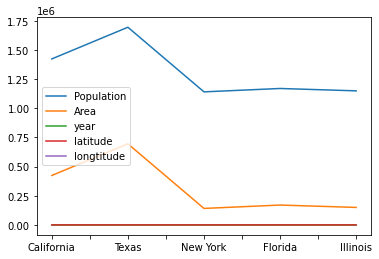

In [ ]:
# plot
states.plot()

In [ ]:
# df indexing: column명 가능// row명, 숫자 indexing 불가능
# df slicing: row명, 숫자 가능// column명 불가능
# df Fancy indexing: coulumn명 가능 
# [row, column] indexing 불가능
df = pd.DataFrame(np.arange(16).reshape(4,4), index = list('abcd'), columns = list('ABCD'))
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [ ]:
# indexing
df['A']
#df['a']
#df[0]

<class 'pandas.core.series.Series'>


In [ ]:
# slicing
# df['A':'B']
df['a':'b']
df[1:3]

   A  B  C  D
a  0  1  2  3
b  4  5  6  7


,A,B,C,D
b,4,5,6,7
c,8,9,10,11


In [ ]:
# Fancy Indexing: dataFrame으로 출력
df[['A']]
df[['A', 'C']]
# df[['A':'C']]
# df[[0]]
# df[['a','c']]
# df[0,0]

,A,C
a,0,2
b,4,6
c,8,10
d,12,14


In [ ]:
# loc: index명
df.loc['a']
df.loc['a', 'B']
df.loc['a', 'B':'C']
df.loc[:, 'B':'C']
df.loc[['a'], ['B']]  # Fancy Indexing -> DataFrame으로 출력

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [ ]:
# iloc: 숫자(integer) 
df.iloc[0]
df.iloc[0,1]
df.iloc[0, 1:2]
df.iloc[0:1, 1:2]
df.iloc[[0],[1]]

In [ ]:
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [ ]:
#조건검색
df[df.B>5]
df[(df.B>5)&(df.C>5)]
df.loc[df.B>5, 'A':'C']
# df.iloc[df.B>5, :]

,A,B,C
c,8,9,10
d,12,13,14


In [ ]:
# pd.concat([dataframe1, dataframe2,..], axis = 0)  #default axis =0
df2 = pd.concat([df.iloc[0:1,0:2],df.iloc[0:2, 1:]])
df2

,A,B,C,D
a,0.0,1,NaN,NaN
a,NaN,1,2.0,3.0
b,NaN,5,6.0,7.0


In [ ]:
# 결측치 제거
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)

df2.dropna(axis=1, inplace = True)
df2.fillna(0, inplace = True)

,A,B,C,D
a,0.0,1,0.0,0.0
a,0.0,1,2.0,3.0
b,0.0,5,6.0,7.0


In [ ]:
# dataframe 파일 저장
df.to_csv('dataframe.txt', sep = '\t')
# 파일 dataframe으로 불러오기
file = pd.read_csv('fname', encoding = '', index_col = 0)